# Introduction to neural network classification with TensorFlow

* binary classificatio
* multitype classification
* multilabel classification

### Creating Data

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# 1000 circles

n_samples = 1000

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

X,y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Visualize the data

In [5]:
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label':y})

In [6]:
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


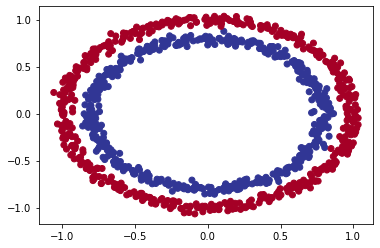

In [7]:
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

### Input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

a first try

In [10]:
tf.random.set_seed(42)

model_00 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation = 'sigmoid', name='input_layer'),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

model_00.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

history_00 = model_00.fit(X,y, epochs =100, verbose =0)
model_00.evaluate(X,y)

32/32 [==============================] - 0s 531us/step - loss: 0.6940 - accuracy: 0.5000


[0.6939972639083862, 0.5]

first course model

In [11]:
tf.random.set_seed(42)

model_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_01.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                 metrics=['accuracy'])

history_01 = model_01.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 500us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 531us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 531us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 531us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 531us/step - loss: 0.6942 - accuracy: 0.4820


In [12]:
# longer training
tf.random.set_seed(42)

model_02 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_02.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                 metrics=['accuracy'])

history_02 = model_02.fit(X,y, epochs=200, verbose=0)

model_02.evaluate(X,y)

32/32 [==============================] - 0s 469us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

that's just a guessing perfomence

More layers!!!

In [13]:
tf.random.set_seed(42)

model_03 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_03.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                 metrics=['accuracy'])

history_03 = model_03.fit(X,y, epochs=200, verbose=0)

model_03.evaluate(X,y)

32/32 [==============================] - 0s 469us/step - loss: 0.6936 - accuracy: 0.5000


[0.6935999989509583, 0.5]

### Improving the model

* more layers, more units
* different optimization
* more epochs

In [14]:
tf.random.set_seed(42)

model_04 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_04.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_04 = model_04.fit(X,y, epochs=100, verbose=0)

model_04.evaluate(X,y)

32/32 [==============================] - 0s 469us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

In [15]:
tf.random.set_seed(42)

model_05 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

model_05.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_05 = model_05.fit(X,y, epochs=100, verbose=0)

model_05.evaluate(X,y)

32/32 [==============================] - 0s 500us/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

still sucks !


## Visualizing data of Model 04

to visualize our model's prediction write a function **plot_decision_boundary()**

* take in a trained model, features X and labels y
* Create a meshgrid of the different X values
* make predictions across the meshgrd
* plot the predictions as well as a line between zones (where each unique class falls)


In [16]:
def plot_decision_boundary(model, X, y):
    '''
    Plots the decision boundary created by a model predicting on X
    resources   1. madewithml (github)
                2. cs231n (github)
    '''
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    # Create X value
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together
    
    #make predictions
    y_pred= model.predict(x_in)
    
    # check for multi-class
    if len(y_pred[0]) >1:
        print('doing multiclass classification')
        # reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
            
    #Plot the decision boundary
    plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40 , cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


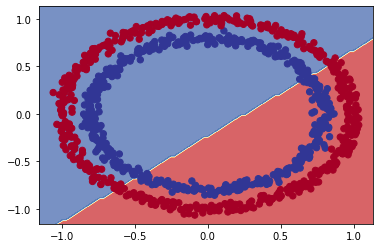

In [17]:
# check out the predictions our model
plot_decision_boundary(model_04, X=X,y=y)

In [18]:
tf.version.VERSION

'2.3.0'

## Can the model be used for regression data?

In [20]:
tf.random.set_seed(42)

X_reg = tf.range(0,1000, 5)
y_reg = tf.range(100, 1100, 5)

#X_reg, y_reg

In [21]:
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]

y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

Since we compiled out model for a binary classification model, not for a lin regression model


In [26]:
tf.random.set_seed(42)

model_06 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_06.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                 metrics='mae')

history_06 = model_06.fit(X_reg_train,y_reg_train, epochs=100, verbose=0)

model_06.evaluate(X_reg_test,y_reg_test)

2/2 [==============================] - 0s 500us/step - loss: 57.8926 - mae: 57.8926


[57.8925895690918, 57.8925895690918]

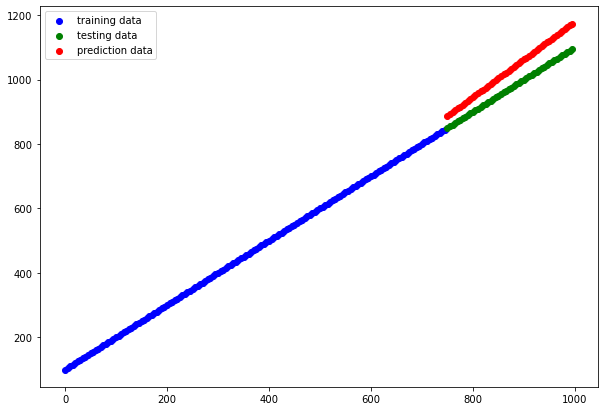

In [27]:
y_reg_preds = model_06.predict(X_reg_test)

plt.figure(figsize=(10,7))

plt.scatter(X_reg_train, y_reg_train, c='b', label = 'training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label = 'testing data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label = 'prediction data')

plt.legend()

The missing piece is non-linearity

In [ ]:
tf.random.set_seed(42)

model_07 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])